Tree Cover Percentage: 4.80%


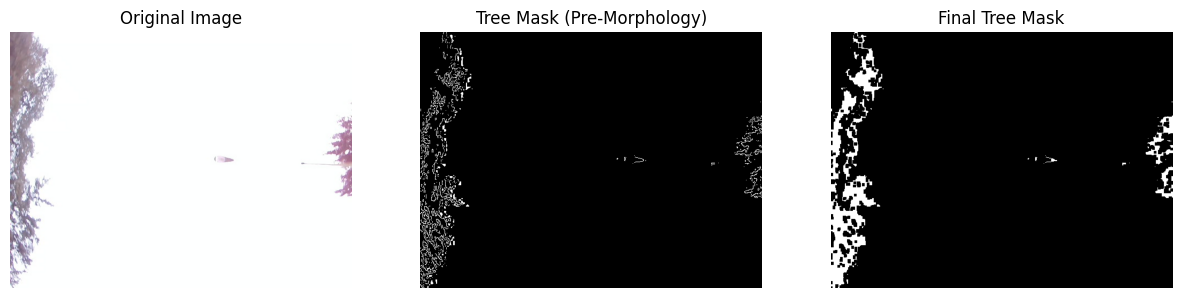

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("exampleTreeImage.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display in Matplotlib

# Step 1: Convert to HSV and Threshold for Green
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
lower_green = (27, 0, 0)
upper_green = (40, 255, 255)
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Step 2: Edge Detection (Optional)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray_image, 255, 255)

# Combine green mask and edges
combined_mask = cv2.bitwise_or(green_mask, edges)

# Step 3: Morphological Operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
cleaned_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel)

# Step 4: Calculate Tree Cover Percentage
tree_pixels = cv2.countNonZero(cleaned_mask)
total_pixels = image.shape[0] * image.shape[1]
tree_cover_percentage = (tree_pixels / total_pixels) * 100

print(f"Tree Cover Percentage: {tree_cover_percentage:.2f}%")

# Step 5: Display Results in Notebook
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(combined_mask, cmap="gray")
axes[1].set_title("Tree Mask (Pre-Morphology)")
axes[1].axis("off")

axes[2].imshow(cleaned_mask, cmap="gray")
axes[2].set_title("Final Tree Mask")
axes[2].axis("off")

plt.show()
